In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from PIL import Image, ImageDraw
import os
import cv2
import xml.etree.ElementTree as gfg 

In [2]:
train_path = '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/train'
test_path = '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/test'

In [3]:
train_df = pd.read_csv('/home/sogaksa123/AIFFEL_THON/model/efficientdet/train.csv')
test_df = pd.read_csv('/home/sogaksa123/AIFFEL_THON/model/efficientdet/test.csv')

In [4]:
train_df.head()

,image_name,xmin,xmax,ymin,ymax,class_id
0,170_1b4_Ar_mc_AKGC417L_2.png,52,155,56,218,crckles
1,170_1b4_Ar_mc_AKGC417L_2.png,0,52,56,218,wheezes
2,170_1b4_Ar_mc_AKGC417L_2.png,52,155,56,218,wheezes
3,164_1b1_Ll_sc_Meditron_0.png,123,214,56,218,crckles
4,164_1b1_Ll_sc_Meditron_0.png,22,69,56,218,wheezes


In [5]:
test_df.head()

,image_name,xmin,xmax,ymin,ymax,class_id
0,178_1b3_Tc_mc_AKGC417L_1.png,85,200,56,218,crckles
1,178_1b3_Tc_mc_AKGC417L_1.png,0,85,56,218,normal
2,178_1b3_Tc_mc_AKGC417L_1.png,200,224,56,218,normal
3,151_2p2_Pr_mc_AKGC417L_2.png,0,54,56,218,normal
4,151_2p2_Pr_mc_AKGC417L_2.png,54,165,56,218,normal


Print Shape of each dataframe

In [6]:
def shape_of_dataset(df, dataset_name="df"):
    
    print(f"{dataset_name} dataset has {df.shape[0]} nrows and {df.shape[1]} ncolumns")
    return df.shape[0], df.shape[1]

In [7]:
train_r, train_c = shape_of_dataset(train_df, "Train")
test_r, test_c = shape_of_dataset(test_df, "Test")

Train dataset has 8682 nrows and 6 ncolumns
Test dataset has 950 nrows and 6 ncolumns


Detect the columns with null values in each dataframe

In [8]:
def count_null_values(df, dataset_name):
    
    num_of_total_null_values = sum(df.isnull().sum().values)
    print(f"{dataset_name} dataset has {num_of_total_null_values} null values")
    return num_of_total_null_values


In [9]:
train_null = count_null_values(train_df, "Train")
test_null = count_null_values(test_df, "Test")

Train dataset has 0 null values
Test dataset has 0 null values


In [10]:
def detect_null_columns(df, dataset_name):
    null_columns = df.columns[df.isnull().any()].tolist()
    num_null_columns = len(null_columns)

    if num_null_columns == 0:
        print(f"{dataset_name} dataset has no null columns")
    else:
        print(f"{dataset_name} dataset has {num_null_columns} null columns and they are:")
        print(", ".join(null_columns))
    
    return null_columns, num_null_columns

In [11]:
total_train_null_cols, train_null_cols  = detect_null_columns(train_df, "Train")
total_test_null_cols, test_null_cols  = detect_null_columns(test_df, "Test")

Train dataset has no null columns
Test dataset has no null columns


Create dataframe to compare between dataframes

In [12]:
detailed_db = pd.DataFrame({
    'dataset' : [],
    'nrows' : [],
    'ncols' :[],
    'null_amount' : [],
    'names_of_null_cols' : [],
    'num_null_cols' : []
})

In [13]:
def fill_db_dataset(dataset_name, nrows, ncols, null_amount, name_null_cols, num_null_cols):
    detailed_db.loc[len(detailed_db.index)] = [dataset_name, nrows, ncols, null_amount, ', '.join(name_null_cols), int(num_null_cols)]

In [14]:
fill_db_dataset('Train', train_r, train_c, train_null, total_train_null_cols, train_null_cols)
fill_db_dataset('Test', test_r, test_c, test_null, total_test_null_cols, test_null_cols)

Display info of each dataframe

In [15]:
def print_info_about_ds(df, name_of_the_ds = "df"):
    print(f"Info about the {name_of_the_ds} dataset: ")
    dash_sep()
    print(df.info())
    
def dash_sep(num=50):
    print("_"*num)

def double_fs_sep(num=40):
    print("//"*num)

In [16]:
print_info_about_ds(train_df, "train")
double_fs_sep()

print_info_about_ds(test_df, "test")

Info about the train dataset: 
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8682 entries, 0 to 8681
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  8682 non-null   object
 1   xmin        8682 non-null   int64 
 2   xmax        8682 non-null   int64 
 3   ymin        8682 non-null   int64 
 4   ymax        8682 non-null   int64 
 5   class_id    8682 non-null   object
dtypes: int64(4), object(2)
memory usage: 407.1+ KB
None
////////////////////////////////////////////////////////////////////////////////
Info about the test dataset: 
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  950 non-null    object
 1   xmin        950 non-null    int64 
 2   xmax

In [17]:
train_df.describe().T.style.set_properties(**{"background-color": "red", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
xmin,8682.000000,76.035936,70.102973,0.000000,1.000000,63.000000,135.000000,223.000000
xmax,8682.000000,142.941949,69.773761,1.000000,84.000000,155.000000,217.000000,224.000000
ymin,8682.000000,56.000000,0.000000,56.000000,56.000000,56.000000,56.000000,56.000000
ymax,8682.000000,218.000000,0.000000,218.000000,218.000000,218.000000,218.000000,218.000000


In [18]:
test_df.describe().T.style.set_properties(**{"background-color": "green", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
xmin,950.000000,73.064211,69.458625,0.000000,1.000000,60.000000,129.000000,223.000000
xmax,950.000000,141.254737,69.882653,1.000000,83.000000,154.000000,206.750000,224.000000
ymin,950.000000,56.000000,0.000000,56.000000,56.000000,56.000000,56.000000,56.000000
ymax,950.000000,218.000000,0.000000,218.000000,218.000000,218.000000,218.000000,218.000000


Display number of unique values in each column of the dataframe

In [19]:
def print_nunique_vals(df, ds_name = 'df'):
    print(f"number of unique values in each column in the {ds_name} dataset:")
    dash_sep(75)
    print(df.nunique())

In [20]:
print_nunique_vals(train_df, 'train')
double_fs_sep()

print_nunique_vals(test_df, 'test')

number of unique values in each column in the train dataset:
___________________________________________________________________________
image_name    2679
xmin           224
xmax           224
ymin             1
ymax             1
class_id         3
dtype: int64
////////////////////////////////////////////////////////////////////////////////
number of unique values in each column in the test dataset:
___________________________________________________________________________
image_name    299
xmin          205
xmax          203
ymin            1
ymax            1
class_id        3
dtype: int64


plot the distrbution of labels in train and test dfs

In [21]:
def plot_miss_vals(df, ds_name):
    msno.matrix(df)
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    plt.show()

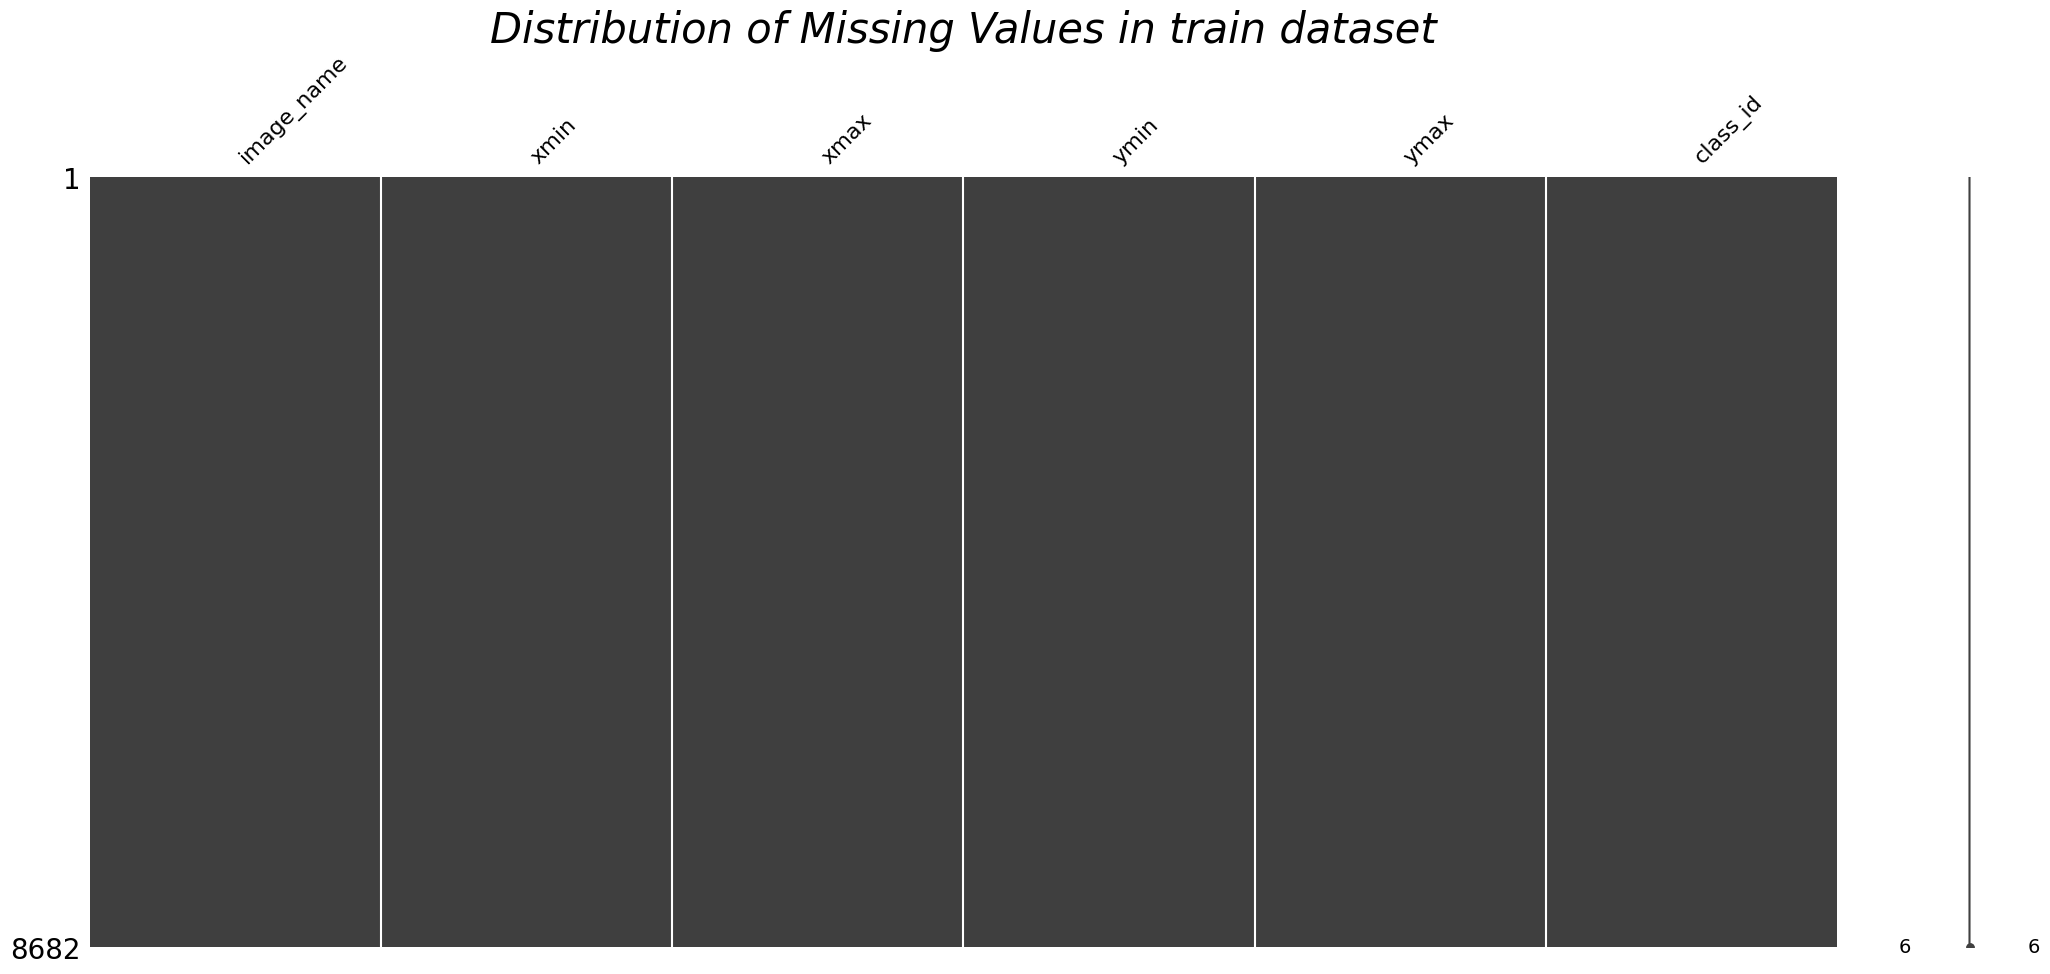

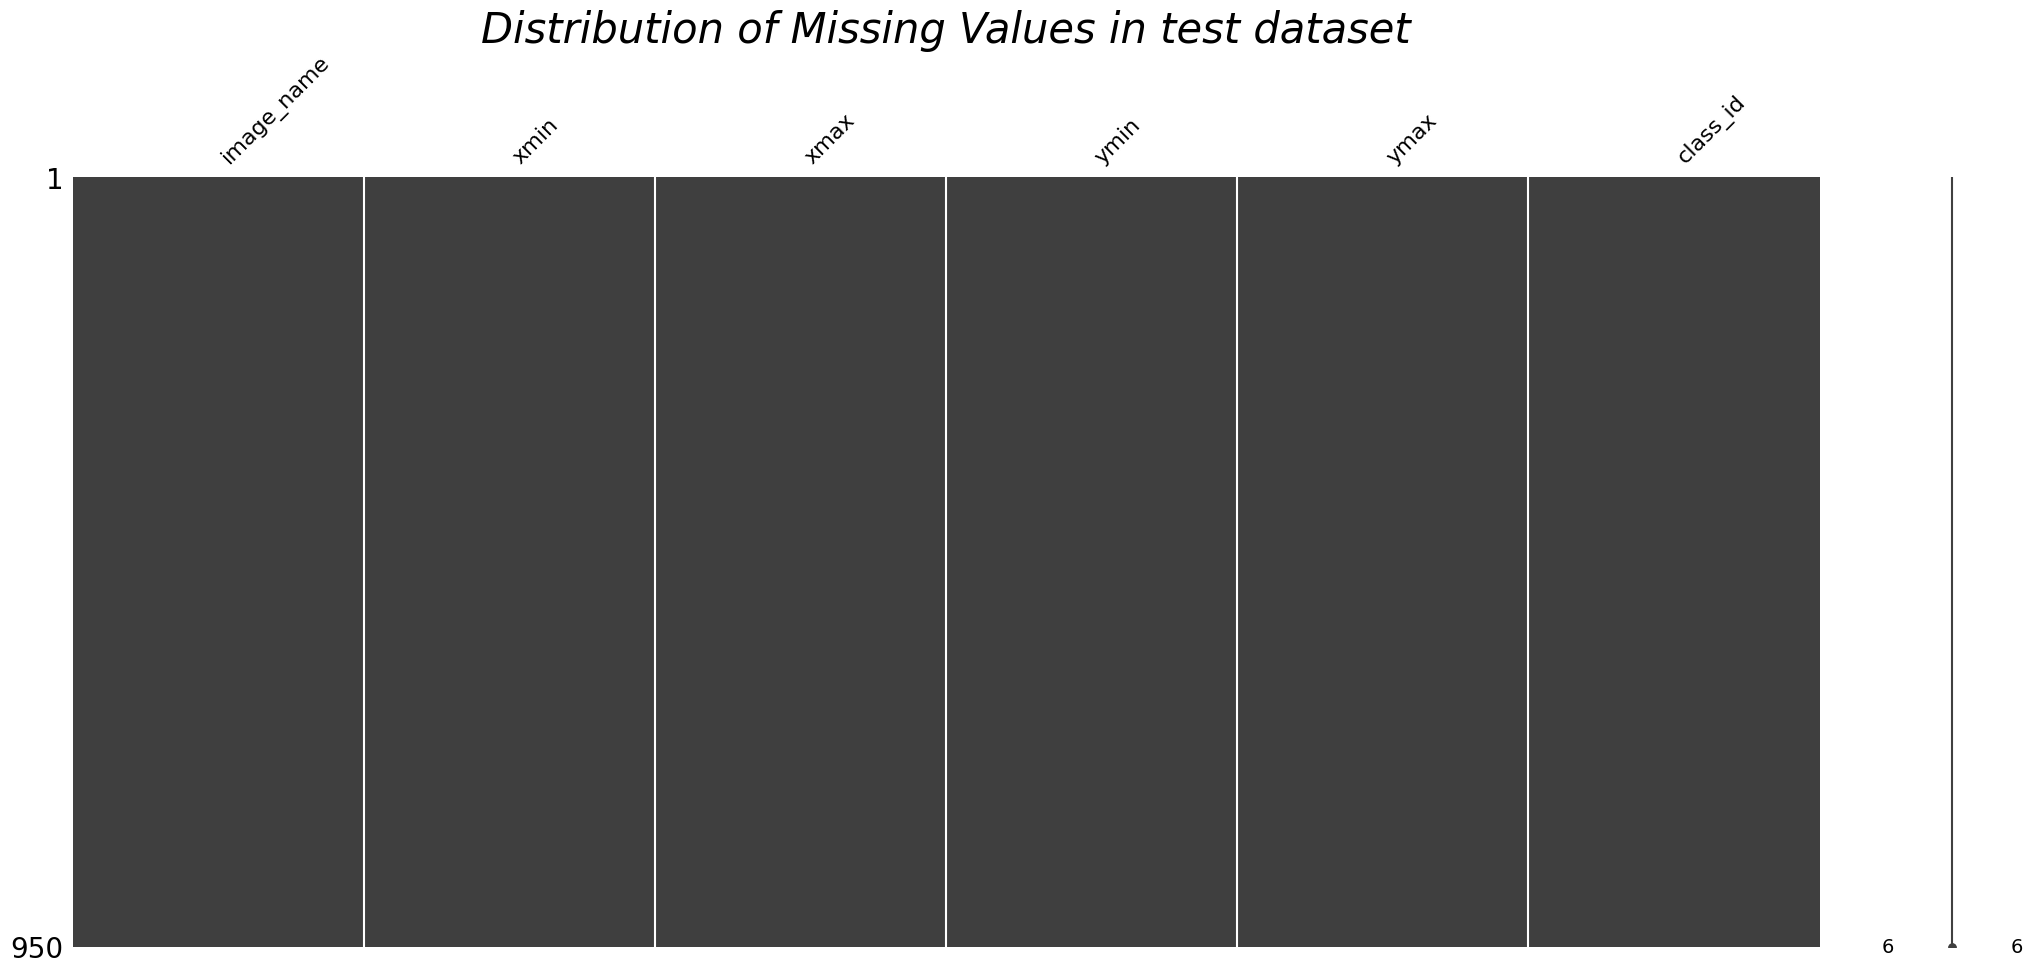

In [22]:
plot_miss_vals(train_df, "train")
plot_miss_vals(test_df, "test")

In [23]:
print(f"We have {train_df['image_name'].nunique()} training images")
print(f"We have {test_df['image_name'].nunique()} testing images")

We have 2679 training images
We have 299 testing images


In [24]:
print(f"We have {train_df.shape[0]} objects in the training dataset")
print(f"We have {test_df.shape[0]} objects in the testing dataset")

We have 8682 objects in the training dataset
We have 950 objects in the testing dataset


plot sample

In [25]:
data_df = train_df.copy()

In [26]:
data_df['file'] = train_path + '/' + data_df['image_name']
data_df.head()

,image_name,xmin,xmax,ymin,ymax,class_id,file
0,170_1b4_Ar_mc_AKGC417L_2.png,52,155,56,218,crckles,/home/sogaksa123/AIFFEL_THON/model/efficientde...
1,170_1b4_Ar_mc_AKGC417L_2.png,0,52,56,218,wheezes,/home/sogaksa123/AIFFEL_THON/model/efficientde...
2,170_1b4_Ar_mc_AKGC417L_2.png,52,155,56,218,wheezes,/home/sogaksa123/AIFFEL_THON/model/efficientde...
3,164_1b1_Ll_sc_Meditron_0.png,123,214,56,218,crckles,/home/sogaksa123/AIFFEL_THON/model/efficientde...
4,164_1b1_Ll_sc_Meditron_0.png,22,69,56,218,wheezes,/home/sogaksa123/AIFFEL_THON/model/efficientde...


Download wget

In [27]:
!pip install wget

In [28]:
import wget

In [29]:
CUSTOM_MODEL_NAME = 'my_efficientdet' 
PRETRAINED_MODEL_NAME = 'efficientdet_d1_coco17_tpu-32'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [30]:
tensor_path = '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/'
if not os.path.exists(tensor_path):
    os.mkdir(tensor_path)

In [31]:
paths = {
    'WORKSPACE_PATH': os.path.join(tensor_path, 'workspace'),
    'SCRIPTS_PATH': os.path.join(tensor_path, 'scripts'),
    'APIMODEL_PATH': os.path.join(tensor_path,'models'),
    'ANNOTATION_PATH': os.path.join(tensor_path, 'workspace','annotations'),
    'IMAGE_PATH': os.path.join(tensor_path, 'workspace','images'),
    'MODEL_PATH': os.path.join(tensor_path, 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join(tensor_path, 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join(tensor_path, 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join(tensor_path, 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join(tensor_path, 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join(tensor_path, 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join(tensor_path,'protoc')
 }

In [32]:
files = {
    'PIPELINE_CONFIG':os.path.join(tensor_path, 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [33]:
paths.values()

dict_values(['/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/scripts', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/models', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/annotations', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/models', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/pre-trained-models', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/models/my_efficientdet', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/models/my_efficientdet/export', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/models/my_efficientdet/tfjsexport', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/models/my_efficientdet/tfliteexport', '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/protoc']

In [34]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [35]:
if not os.path.exists(os.path.join(paths['IMAGE_PATH'], 'train')):
    os.mkdir(paths['IMAGE_PATH'] + '/' + 'train' )

In [36]:
if not os.path.exists(os.path.join(paths['IMAGE_PATH'], 'test')):
    os.mkdir(paths['IMAGE_PATH'] + '/' + 'test' )

Difine width and height

In [37]:
width, height, depth = 224,224,3

Move training and testing data resized to our new train and test images folder

In [38]:
train_dir = os.listdir(train_path)
train_image_names = train_df['image_name'].unique()
saved_train_path = paths['IMAGE_PATH'] + '/' + 'train'

In [39]:
train_dir[:5]

['170_1b4_Ar_mc_AKGC417L_2.xml',
 '164_1b1_Ll_sc_Meditron_0.xml',
 '141_1b2_Tc_mc_LittC2SE_0.png',
 '122_2b1_Al_mc_LittC2SE_2.xml',
 '167_1b1_Al_sc_Meditron_2.png']

In [40]:
train_image_names[:5]

array(['170_1b4_Ar_mc_AKGC417L_2.png', '164_1b1_Ll_sc_Meditron_0.png',
       '185_1b1_Ll_sc_Litt3200_0.png', '192_2b3_Ar_mc_LittC2SE_2.png',
       '145_3b4_Pl_mc_AKGC417L_1.png'], dtype=object)

In [41]:
saved_train_path

'/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/train'

In [42]:
import os
import cv2

def move_data(image_nms, source_path, saved_path, dirc, width, height):
    for img in image_nms:
        try:
            if not os.path.exists(saved_path+'/'+img):
                png_img = dirc[dirc.index(img)]
                read_img = cv2.imread(source_path+'/'+png_img)
                resized_img = cv2.resize(read_img, (width, height))
                cv2.imwrite(saved_path+'/'+png_img, resized_img)
            else:
                print(f"File '{img}' already exists in '{saved_path}'")
        except ValueError:
            print(f"Error: File '{img}' not found in the directory.")

In [43]:
move_data(train_image_names, train_path, saved_train_path, train_dir, width, height)

File '170_1b4_Ar_mc_AKGC417L_2.png' already exists in '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/train'
File '164_1b1_Ll_sc_Meditron_0.png' already exists in '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/train'
File '185_1b1_Ll_sc_Litt3200_0.png' already exists in '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/train'
File '192_2b3_Ar_mc_LittC2SE_2.png' already exists in '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/train'
File '145_3b4_Pl_mc_AKGC417L_1.png' already exists in '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/train'
File '193_7b3_Tc_mc_AKGC417L_0.png' already exists in '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/train'
File '204_7p5_Al_mc_AKGC417L_2.png' already exists in '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/train'
File '199_2b3_Ll_mc_LittC2SE_1.png' already exists in '

In [45]:
print(f"{len(os.listdir(saved_train_path))} images had been saved")

5358 images had been saved


In [47]:
test_dir = os.listdir(test_path)
test_image_names = test_df['image_name'].unique()
saved_test_path = paths['IMAGE_PATH'] + '/' + 'test'

In [48]:
move_data(test_image_names, test_path, saved_test_path, test_dir, width, height)

File '178_1b3_Tc_mc_AKGC417L_1.png' already exists in '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/test'
Error: File '151_2p2_Pr_mc_AKGC417L_2.png' not found in the directory.
Error: File '132_2b1_Lr_mc_LittC2SE_0.png' not found in the directory.
Error: File '112_1b1_Ar_sc_Meditron_5.png' not found in the directory.
Error: File '200_2p3_Pl_mc_AKGC417L_2.png' not found in the directory.
Error: File '203_1p2_Lr_mc_AKGC417L_1.png' not found in the directory.
Error: File '135_2b1_Al_mc_LittC2SE_1.png' not found in the directory.
Error: File '149_1b1_Pl_sc_Meditron_2.png' not found in the directory.
Error: File '162_2b2_Pr_mc_AKGC417L_1.png' not found in the directory.
Error: File '151_3p3_Ll_mc_AKGC417L_0.png' not found in the directory.
Error: File '107_2b5_Al_mc_AKGC417L_2.png' not found in the directory.
Error: File '130_1p3_Al_mc_AKGC417L_0.png' not found in the directory.
Error: File '218_1b1_Pr_sc_Meditron_6.png' not found in the directory.
Error: File '1

In [49]:
print(f"{len(os.listdir(saved_test_path))} images had been saved")

598 images had been saved


add path to our train and test dfs

In [51]:
def create_path_df(path, num_r, df):
    lPath = [path+'/'+i for i in df['image_name']]
    return lPath

In [52]:
lPath = create_path_df(saved_train_path, train_df.shape[0], train_df)
train_df['path'] = lPath

In [53]:
train_df.head()

,image_name,xmin,xmax,ymin,ymax,class_id,path
0,170_1b4_Ar_mc_AKGC417L_2.png,52,155,56,218,crckles,/home/sogaksa123/AIFFEL_THON/model/efficientde...
1,170_1b4_Ar_mc_AKGC417L_2.png,0,52,56,218,wheezes,/home/sogaksa123/AIFFEL_THON/model/efficientde...
2,170_1b4_Ar_mc_AKGC417L_2.png,52,155,56,218,wheezes,/home/sogaksa123/AIFFEL_THON/model/efficientde...
3,164_1b1_Ll_sc_Meditron_0.png,123,214,56,218,crckles,/home/sogaksa123/AIFFEL_THON/model/efficientde...
4,164_1b1_Ll_sc_Meditron_0.png,22,69,56,218,wheezes,/home/sogaksa123/AIFFEL_THON/model/efficientde...


In [54]:
lPath = create_path_df(saved_test_path, test_df.shape[0], test_df)
test_df['path'] = lPath

In [55]:
test_df.head()

,image_name,xmin,xmax,ymin,ymax,class_id,path
0,178_1b3_Tc_mc_AKGC417L_1.png,85,200,56,218,crckles,/home/sogaksa123/AIFFEL_THON/model/efficientde...
1,178_1b3_Tc_mc_AKGC417L_1.png,0,85,56,218,normal,/home/sogaksa123/AIFFEL_THON/model/efficientde...
2,178_1b3_Tc_mc_AKGC417L_1.png,200,224,56,218,normal,/home/sogaksa123/AIFFEL_THON/model/efficientde...
3,151_2p2_Pr_mc_AKGC417L_2.png,0,54,56,218,normal,/home/sogaksa123/AIFFEL_THON/model/efficientde...
4,151_2p2_Pr_mc_AKGC417L_2.png,54,165,56,218,normal,/home/sogaksa123/AIFFEL_THON/model/efficientde...


In [57]:
train_df['xmin'] = train_df['xmin'].astype('int32')
train_df['ymin'] = train_df['ymin'].astype('int32')
train_df['xmax'] = train_df['xmax'].astype('int32')
train_df['ymax'] = train_df['ymax'].astype('int32')

In [58]:
saved_train_path

'/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images/train'

In [59]:
len(os.listdir(saved_train_path))

5358

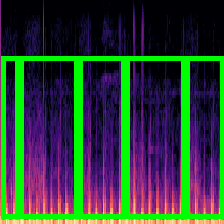

In [60]:
ldf = train_df[train_df['image_name'] == '101_1b1_Al_sc_Meditron_0.png']

f= saved_train_path + '/' + '101_1b1_Al_sc_Meditron_0.png'
img = Image.open(f)
draw = ImageDraw.Draw(img)
xres, yres = img.size[0], img.size[1]

for i in range(len(ldf)):
    
    draw.rectangle([int(ldf.iloc[i]['xmin']),
                            int(ldf.iloc[i]['ymin']),
                            int(ldf.iloc[i]['xmax']),
                            int(ldf.iloc[i]['ymax'])], width=5, outline=(0,255,0))

img

Generate annotation files for training and testing images

In [90]:
def GenerateXML(folder_name, df, image_names, saved_path):
      
    for img_name in image_names:

        img_df = df[df['image_name'] == img_name]
        image_name = img_df['image_name'].values[0]
        file_path = df['path'].values[0]


        root = gfg.Element("annotation")
        
        m1 = gfg.SubElement(root, "folder")
        m1.text = folder_name

        m2 = gfg.SubElement(root,"filename")
        m2.text = image_name

        m3 = gfg.SubElement(root, "path")
        m3.text = file_path

        m4 = gfg.SubElement(root, "source")
        c1 = gfg.SubElement(m4, "database")
        c1.text = "Unknown"

        m5 = gfg.SubElement(root, "size")
        
        c2 = gfg.SubElement(m5, "width")
        c3 = gfg.SubElement(m5, "height")
        c4 = gfg.SubElement(m5, "depth")
        
        c2.text = str(width)
        c3.text = str(height)
        c4.text = str(depth)

        m6 = gfg.SubElement(root, "segmented")
        m6.text = "0"
        
        for (xmin, ymin, xmax, ymax, class_name) in zip(img_df['xmin'], img_df['ymin'], img_df['xmax'], img_df['ymax'], img_df['class_id']):
            
            m7 = gfg.SubElement(root, "object")
            c5 = gfg.SubElement(m7,"name")
            c6 = gfg.SubElement(m7, "pose")
            c7 = gfg.SubElement(m7, "truncated")
            c8 = gfg.SubElement(m7, "difficult")
            c9 = gfg.SubElement(m7, "bndbox")
            d1 = gfg.SubElement(c9, "xmin")
            d2 = gfg.SubElement(c9, "ymin")
            d3 = gfg.SubElement(c9, "xmax")
            d4 = gfg.SubElement(c9, "ymax")
            
            label = class_name
            
            c5.text = label
            c6.text = "Unspecified"
            c7.text = "0"
            c8.text = "0"
            d1.text = str(xmin)
            d2.text = str(ymin)
            d3.text = str(xmax)
            d4.text = str(ymax)
            
      
        tree = gfg.ElementTree(root)
        
        saved_name = img_name.split('.')

       
        with open (saved_path+'/'+saved_name[0]+'.xml', "wb") as files :
            tree.write(files)

In [91]:
train_image_names = train_df['image_name'].unique()

In [92]:
GenerateXML('train', train_df, train_image_names, saved_train_path)

In [93]:
print(f"{len(os.listdir(saved_train_path))} files had been saved")

5358 files had been saved


In [95]:
test_image_names = test_df['image_name'].unique()

In [96]:
GenerateXML('test', test_df, test_image_names, saved_test_path)

In [97]:
print(f"{len(os.listdir(saved_test_path))} files had been saved")

598 files had been saved


In [98]:
paths['APIMODEL_PATH']

'/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/models'

Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [63]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/models'...
remote: Enumerating objects: 96887, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 96887 (delta 52), reused 46 (delta 19), pack-reused 96720
Receiving objects: 100% (96887/96887), 611.06 MiB | 19.33 MiB/s, done.
Resolving deltas: 100% (70464/70464), done.


In [107]:
!apt-get install protobuf-compiler -y
!cd /home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/models/ && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 

object_detection/protos/*.proto: No such file or directory


In [103]:
os.name

'posix'

In [66]:
import object_detection

In [67]:
paths['PRETRAINED_MODEL_PATH']

'/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/pre-trained-models'

Download EfficientDetF1

In [68]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2024-04-09 07:14:00--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 34.64.4.59, 34.64.4.27, 34.64.4.123, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|34.64.4.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51839363 (49M) [application/x-tar]
Saving to: ‘efficientdet_d1_coco17_tpu-32.tar.gz’

efficientdet_d1_coc 100%[===================>]  49.44M  20.5MB/s    in 2.4s    

2024-04-09 07:14:03 (20.5 MB/s) - ‘efficientdet_d1_coco17_tpu-32.tar.gz’ saved [51839363/51839363]

efficientdet_d1_coco17_tpu-32/
efficientdet_d1_coco17_tpu-32/checkpoint/
efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d1_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d1_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d1_coco17_tpu-32/pipeline.config
efficientdet_d1_coco17_tpu-32/saved_model/
efficientdet_d1

In [71]:
labels = [{'name':'normal', 'id':1}, {'name':'crckle', 'id':2}, {'name':'wheezes', 'id':3}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [72]:
paths['IMAGE_PATH']

'/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/images'

In [73]:
files['TF_RECORD_SCRIPT']

'/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/scripts/generate_tfrecord.py'

create TF records

In [74]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into '/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 2.67 KiB | 2.67 MiB/s, done.


In [75]:
files['LABELMAP']

'/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/annotations/label_map.pbtxt'

In [76]:
paths['ANNOTATION_PATH']

'/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/workspace/annotations'

In [79]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 

Traceback (most recent call last):
  File "/home/sogaksa123/AIFFEL_THON/model/efficientdet/dataset/scripts/generate_tfrecord.py", line 29, in <module>
    from object_detection.utils import dataset_util, label_map_util
  File "/home/sogaksa123/anaconda3/envs/sogaksa/lib/python3.10/site-packages/object_detection/utils/label_map_util.py", line 29, in <module>
    from object_detection.protos import string_int_label_map_pb2
ImportError: cannot import name 'string_int_label_map_pb2' from 'object_detection.protos' (/home/sogaksa123/anaconda3/envs/sogaksa/lib/python3.10/site-packages/object_detection/protos/__init__.py)
